In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [5]:
lec_df = pd.read_csv('/content/drive/MyDrive/mphti/lectures.csv')
ques_df = pd.read_csv('/content/drive/MyDrive/mphti/questions.csv')
train_df = pd.read_csv('/content/drive/MyDrive/mphti/train.csv', nrows=10000000) # speed up EDA

In [6]:
# Display basic information about the datasets
print("Train Dataset Info:")
print(train_df.info())
print("\nQuestions Dataset Info:")
print(ques_df.info())
print("\nLectures Dataset Info:")
print(lec_df.info())

Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 762.9+ MB
None

Questions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null 

# First of all, let's look at the data in the train




In [7]:
train_df.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


In [8]:
# check nuber of none by collum
train_df.isnull().sum()

,0
row_id,0
timestamp,0
user_id,0
content_id,0
content_type_id,0
task_container_id,0
user_answer,0
answered_correctly,0
prior_question_elapsed_time,234784
prior_question_had_explanation,39388


In [9]:
train_df.describe()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,9.765216e+06
mean,5.000000e+06,7.546528e+09,1.079943e+08,5.209509e+03,1.953960e-02,8.776194e+02,1.376462e+00,6.262029e-01,2.547559e+04
std,2.886751e+06,1.141381e+10,6.311024e+07,3.867783e+03,1.384117e-01,1.334407e+03,1.193603e+00,5.226395e-01,1.995033e+04
min,0.000000e+00,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00
25%,2.500000e+06,5.109600e+08,5.398177e+07,2.059000e+03,0.000000e+00,1.020000e+02,0.000000e+00,0.000000e+00,1.600000e+04
50%,5.000000e+06,2.612310e+09,1.067638e+08,5.016000e+03,0.000000e+00,3.710000e+02,1.000000e+00,1.000000e+00,2.100000e+04
75%,7.499999e+06,9.751909e+09,1.630735e+08,7.402000e+03,0.000000e+00,1.055000e+03,3.000000e+00,1.000000e+00,2.966600e+04
max,9.999999e+06,8.470816e+10,2.167479e+08,3.273600e+04,1.000000e+00,9.999000e+03,3.000000e+00,1.000000e+00,3.000000e+05


In [10]:
train_df.content_type_id.value_counts()


,count
content_type_id,
0,9804604
1,195396


Value counts for content_type_id:
content_type_id
0    9804604
1     195396
Name: count, dtype: int64



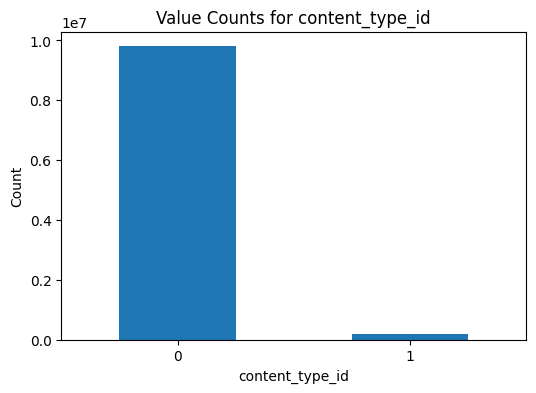

Value counts for prior_question_had_explanation:
prior_question_had_explanation
True     8855555
False    1105057
Name: count, dtype: int64



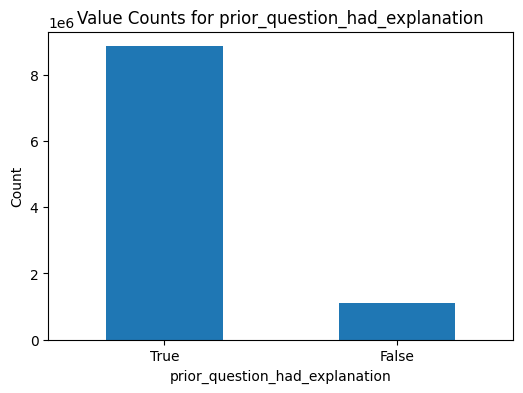

In [11]:
# see all binary collumn
for col in train_df.columns:
  if train_df[col].nunique() == 2:
    value_counts = train_df[col].value_counts()
    print(f"Value counts for {col}:\n{value_counts}\n")
    # Create a bar chart for the value counts
    plt.figure(figsize=(6, 4))
    value_counts.plot(kind='bar')
    plt.title(f"Value Counts for {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

*  content_type_id - There are far fewer events in the lecture than questions
*  prior_question_had_explanation - usualy user have explanations



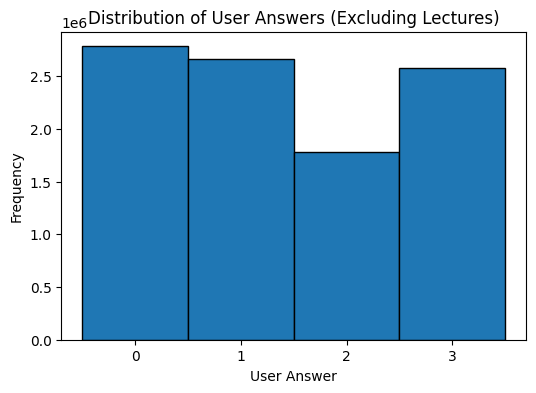

In [12]:
filtered_user_answers = train_df[train_df['user_answer'] != -1]['user_answer']
plt.figure(figsize=(6, 4))
plt.hist(filtered_user_answers, bins=range(0, 5), edgecolor='black', align='left')
plt.title('Distribution of User Answers (Excluding Lectures)')
plt.xlabel('User Answer')
plt.ylabel('Frequency')
plt.xticks(range(0, 4))
plt.show()

Text(0, 0.5, 'Frequency')

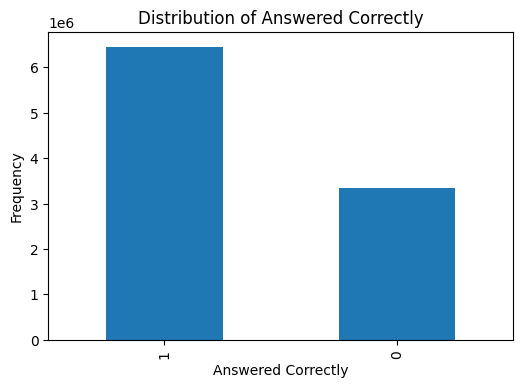

In [13]:
filtered_answers = train_df[train_df['answered_correctly'] != -1]['answered_correctly']
value_counts = filtered_answers.value_counts()
total_count = value_counts.sum()
plt.figure(figsize=(6, 4))
value_counts.plot(kind='bar')
plt.title('Distribution of Answered Correctly')
plt.xlabel('Answered Correctly')
plt.ylabel('Frequency')

the number of correct answers is significantly approximately twice as many as incorrect ones

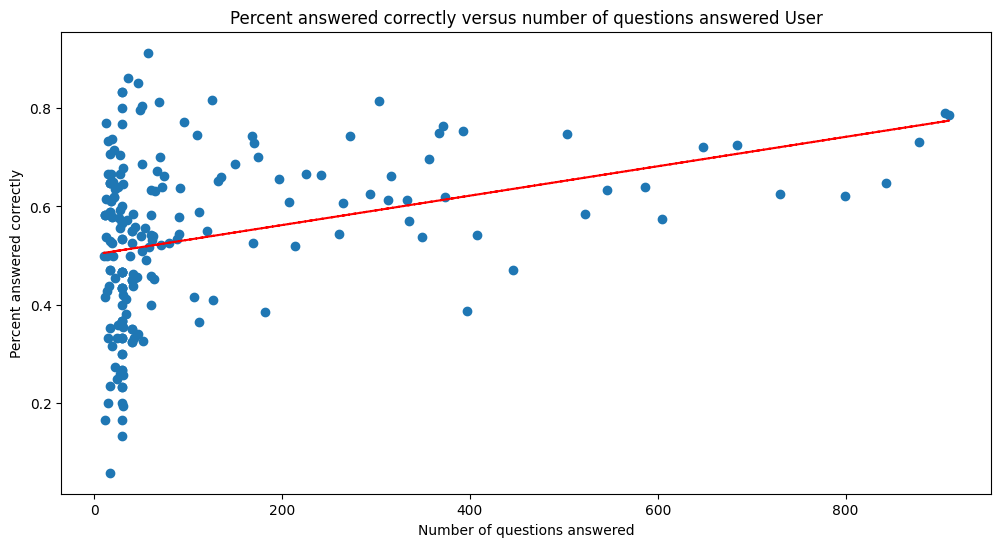

In [14]:
user_percent = train_df[train_df.answered_correctly != -1].groupby('user_id')['answered_correctly'].agg(Mean='mean', Answers='count')
user_percent = user_percent.query('Answers <= 1000').sample(n=200, random_state=1)
fig = plt.figure(figsize=(12,6))
x = user_percent.Answers
y = user_percent.Mean
plt.scatter(x, y, marker='o')
plt.title("Percent answered correctly versus number of questions answered User")
plt.xticks(rotation=0)
plt.xlabel("Number of questions answered")
plt.ylabel("Percent answered correctly")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

Let's check question

In [15]:
user_question=train_df.groupby('user_id')[['row_id', 'answered_correctly']].agg({'row_id': 'count', 'answered_correctly': 'sum'}).reset_index().rename(columns={'row_id': 'num_questions'})
user_question['percent_answered_correctly']=100*user_question.answered_correctly/user_question.num_questions
user_question['answered_wrong']=user_question['num_questions']-user_question['answered_correctly']
user_question.head()

,user_id,num_questions,answered_correctly,percent_answered_correctly,answered_wrong
0,115,46,32,69.565217,14
1,124,30,7,23.333333,23
2,2746,20,10,50.000000,10
3,5382,128,81,63.281250,47
4,8623,112,67,59.821429,45


In [16]:
user_question.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39491 entries, 0 to 39490
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   user_id                     39491 non-null  int64  
 1   num_questions               39491 non-null  int64  
 2   answered_correctly          39491 non-null  int64  
 3   percent_answered_correctly  39491 non-null  float64
 4   answered_wrong              39491 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 1.5 MB


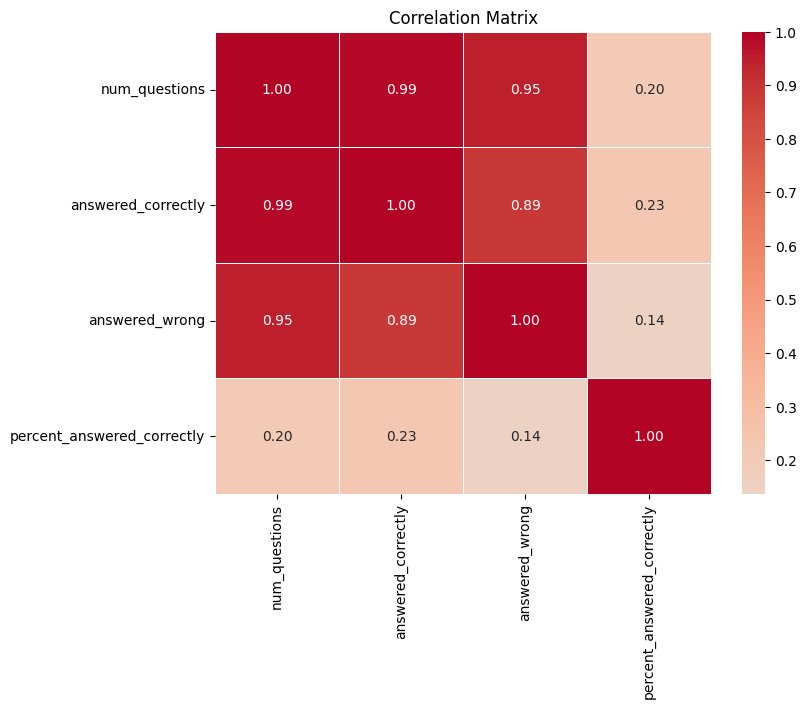

In [17]:
correlation_matrix = user_question[['num_questions', 'answered_correctly', 'answered_wrong', 'percent_answered_correctly']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

<ipython-input-18-c285e1c34aa0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(user_question.percent_answered_correctly, bins=100)


<Axes: xlabel='percent_answered_correctly', ylabel='Density'>

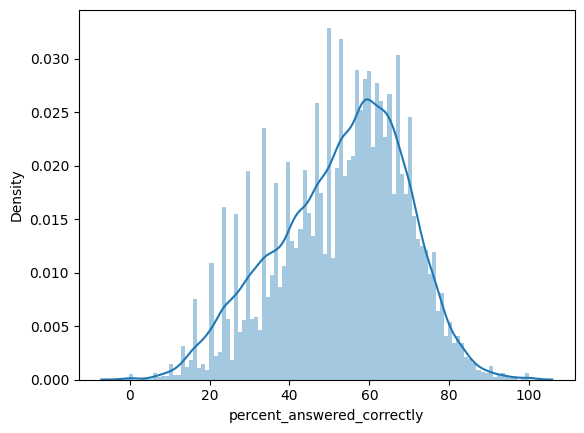

In [18]:
sns.distplot(user_question.percent_answered_correctly, bins=100)

we can see normal distribution - most people answear between 35%-78%

<Axes: xlabel='num_questions', ylabel='percent_answered_correctly'>

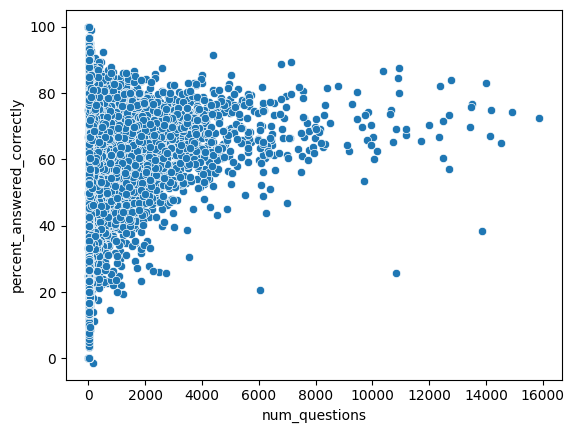

In [19]:
sns.scatterplot(data=user_question,
                x='num_questions',
                y='percent_answered_correctly',
               )

looks like the variability in percent questions answered is getting decreased as the user answers more questions

In [24]:
user_question[user_question.num_questions>10000].shape
def question_bin(num_questions):
    if num_questions<=10:
        return "0-10"
    elif num_questions>10 and num_questions<=30:
        return '10-30'
    elif num_questions >30 and num_questions<=100:
        return '30-100'
    elif num_questions >100 and num_questions<=1000:
        return '100-1000'
    elif num_questions >1000 and num_questions<=5000:
        return '1000-5000'
    elif num_questions>5000:
        return ">5000"

In [26]:
user_question['question_bin']=user_question.num_questions.apply(question_bin)
question_bin=user_question.groupby('question_bin')[['percent_answered_correctly']].agg(['min', 'max', 'mean', 'std']).reset_index()
question_bin.columns=['question_bin', 'min', 'max', 'mean', 'std']
question_bin.head(10)

,question_bin,min,max,mean,std
0,0-10,0.000000,100.000000,44.400230,21.323667
1,10-30,0.000000,100.000000,46.656680,17.485505
2,100-1000,-1.307190,92.727273,60.399895,10.876530
3,1000-5000,19.476268,91.382857,63.746130,9.810881
4,30-100,6.451613,100.000000,53.456325,14.576402
5,>5000,20.684524,89.347368,68.553998,9.916211


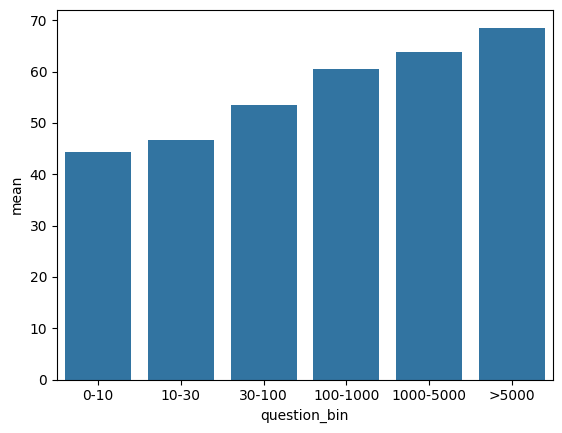

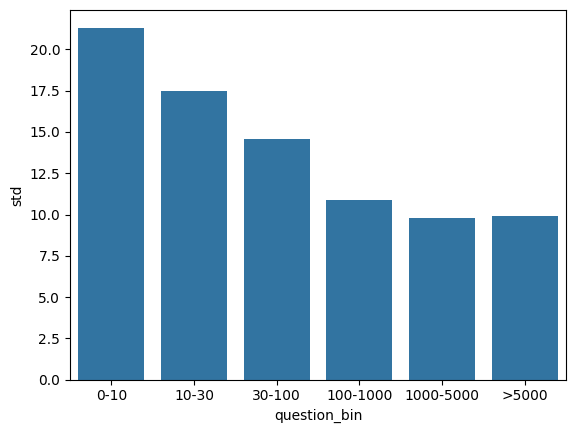

In [27]:
sns.barplot(data=question_bin,
            x='question_bin',
            y='mean',
            order=['0-10', '10-30', '30-100', '100-1000', '1000-5000', '>5000']
           )

plt.show()
sns.barplot(data=question_bin,
            x='question_bin',
            y='std',
            order=['0-10', '10-30', '30-100', '100-1000', '1000-5000', '>5000']
           )

plt.show()

clearly as the number of questions attempted increases; there is a raise in the mean of the correct answers and reduction in the varaince of correct answers.

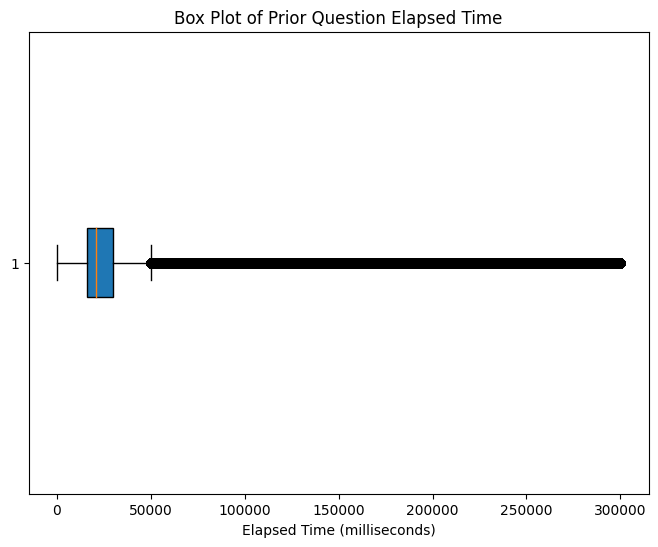

In [20]:
filtered_time = train_df['prior_question_elapsed_time'].dropna()

plt.figure(figsize=(8, 6))
plt.boxplot(filtered_time, vert=False, patch_artist=True)
plt.title('Box Plot of Prior Question Elapsed Time')
plt.xlabel('Elapsed Time (milliseconds)')
plt.show()

we have a large tail of outliers towards a long answer - most likely the user has moved away or is connected with something else (in the future we can additionally examine these outliers relative to the general meaning in order to exclude complex questions (on which the user thought for a long time) and to remove those outliers that are most likely caused by external circumstances)

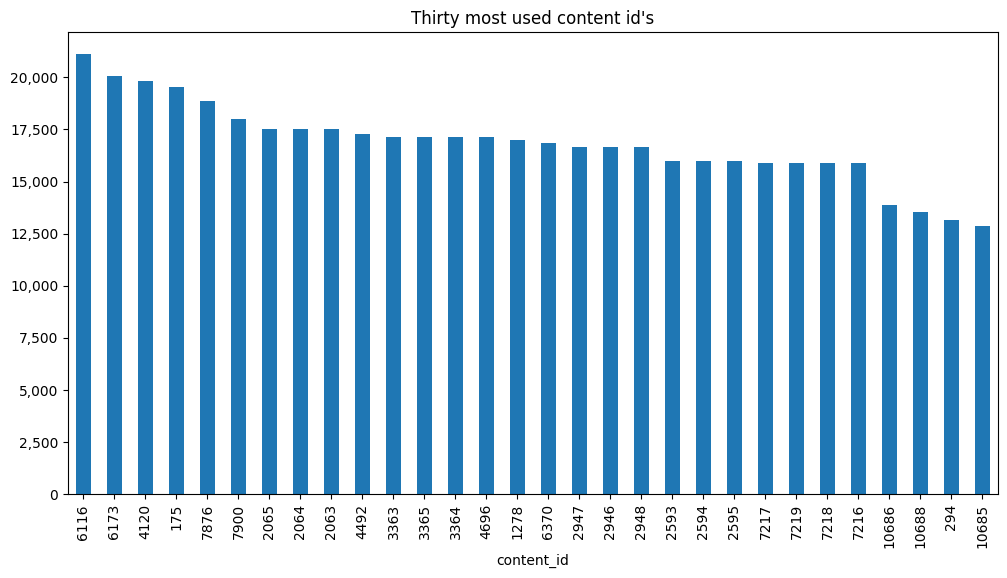

In [21]:
cids = train_df.content_id.value_counts()[:30]

fig = plt.figure(figsize=(12,6))
ax = cids.plot.bar()
plt.title("Thirty most used content id's")
plt.xticks(rotation=90)
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ','))) #add thousands separator
plt.show()

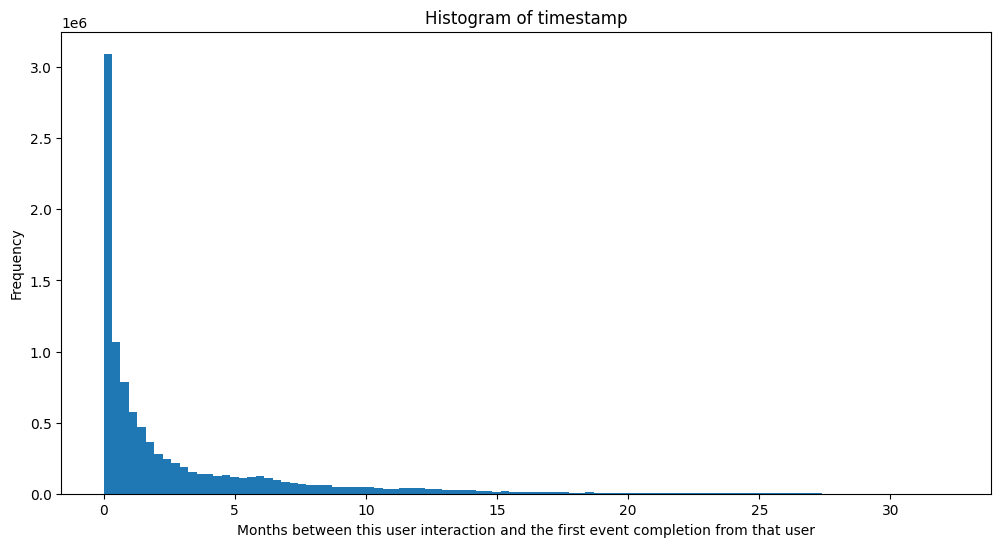

In [22]:
#1 year = 31536000000 ms
ts = train_df['timestamp']/(31536000000/12)
fig = plt.figure(figsize=(12,6))
ts.plot.hist(bins=100)
plt.title("Histogram of timestamp")
plt.xticks(rotation=0)
plt.xlabel("Months between this user interaction and the first event completion from that user")
plt.show()

we saw who wasn't very keen on the course or had long breaks

 Look at questions

In [41]:
ques_df.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [30]:
ques_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


In [44]:
ques_df[ques_df.tags.isna()]

,question_id,bundle_id,correct_answer,part,tags
10033,10033,10033,2,6,NaN


In [46]:
train_df.query('content_id == "10033" and answered_correctly != -1')

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation


looksa like we dont have this question in our train (many we split it)

In [48]:
ques_df['tags'] = ques_df['tags'].astype(str)

tags = [x.split() for x in ques_df[ques_df.tags != "nan"].tags.values]
tags = [item for elem in tags for item in elem]
tags = set(tags)
tags = list(tags)
print(f'There are {len(tags)} different tags')

There are 188 different tags


In [50]:
# Let's find out how many answers were Right and Wrong per question_id (so per content_id in train).
tags_list = [x.split() for x in ques_df.tags.values]
ques_df['tags'] = tags_list
ques_df.head()

correct = train_df[train_df.answered_correctly != -1].groupby(["content_id", 'answered_correctly'], as_index=False).size()
correct = correct.pivot(index= "content_id", columns='answered_correctly', values='size')
correct.columns = ['Wrong', 'Right']
correct = correct.fillna(0)
correct[['Wrong', 'Right']] = correct[['Wrong', 'Right']].astype(int)
questions = ques_df.merge(correct, left_on = "question_id", right_on = "content_id", how = "left")
questions.head()

,question_id,bundle_id,correct_answer,part,tags,Wrong,Right
0,0,0,0,1,"[51, 131, 162, 38]",63.0,628.0
1,1,1,1,1,"[131, 36, 81]",77.0,649.0
2,2,2,0,1,"[131, 101, 162, 92]",1970.0,2531.0
3,3,3,0,1,"[131, 149, 162, 29]",500.0,1776.0
4,4,4,3,1,"[131, 5, 162, 38]",1173.0,1980.0


Now, I can add up all Wrong and Right answers for all questions that are labeled with a particular tag and calculate the percent correct for each tag. Please note that there is "double counting" of questions; for instance if a question has 5 tags, its answers are aggregated in the totals of each of the 5 tags.

In [54]:
tags_df = pd.DataFrame()
for x in range(len(tags)):
    df = questions[questions.tags.apply(lambda l: tags[x] in l)]
    df1 = df.agg({'Wrong': ['sum'], 'Right': ['sum']})
    df1['Total_questions'] = df1.Wrong + df1.Right
    df1['Question_ids_with_tag'] = len(df)
    df1['tag'] = tags[x]
    df1 = df1.set_index('tag')
    tags_df = pd.concat([tags_df, df1])

tags_df[['Wrong', 'Right', 'Total_questions']] = tags_df[['Wrong', 'Right', 'Total_questions']].astype(int)
tags_df['Percent_correct'] = tags_df.Right/tags_df.Total_questions
tags_df = tags_df.sort_values(by = "Percent_correct")

tags_df.head()

,Wrong,Right,Total_questions,Question_ids_with_tag,Percent_correct
tag,,,,,
24,15523,9653,25176,17,0.383421
23,25673,20228,45901,11,0.440688
19,17267,13833,31100,57,0.444791
151,26954,25882,52836,16,0.489855
108,23213,23511,46724,20,0.503189


We can see, the differences are significant!

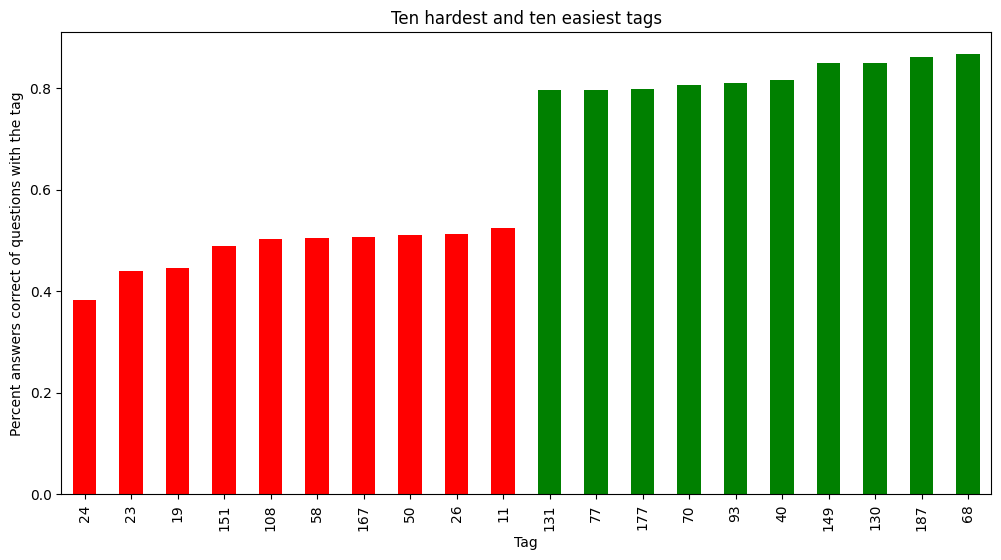

In [55]:
select_rows = list(range(0,10)) + list(range(178, len(tags_df)))
tags_select = tags_df.iloc[select_rows,4]

fig = plt.figure(figsize=(12,6))
x = tags_select.index
y = tags_select.values
clrs = ['red' if y < 0.6 else 'green' for y in tags_select.values]
tags_select.plot.bar(x, y, color=clrs)
plt.title("Ten hardest and ten easiest tags")
plt.xlabel("Tag")
plt.ylabel("Percent answers correct of questions with the tag")
plt.xticks(rotation=90)
plt.show()

However, we should also realize that the tag with the worst percent_correct only has about 250,000 answers. This a low number compared to the tags with most answers.

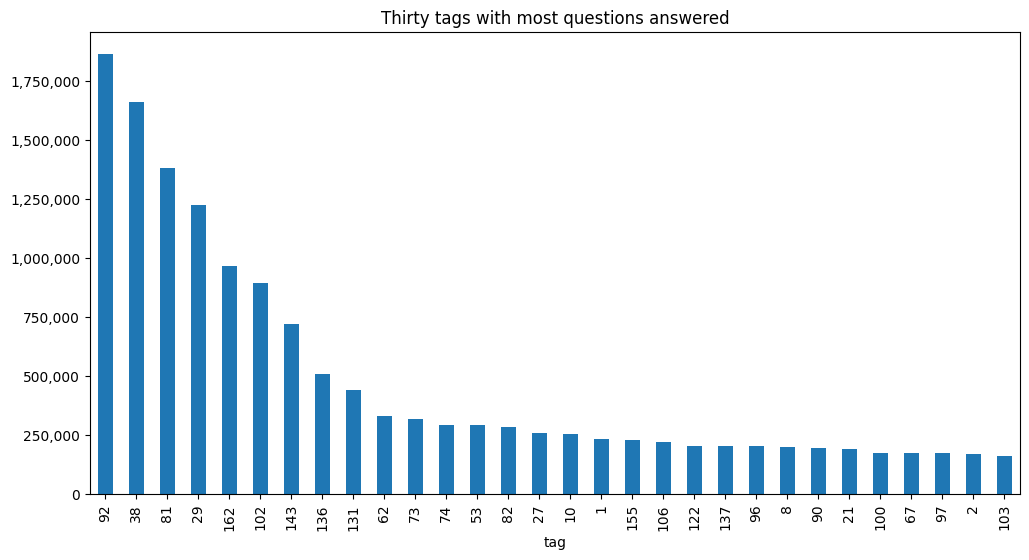

In [56]:
tags_select = tags_df.sort_values(by = "Total_questions", ascending = False).iloc[:30,:]
tags_select = tags_select["Total_questions"]

fig = plt.figure(figsize=(12,6))
ax = tags_select.plot.bar()
plt.title("Thirty tags with most questions answered")
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ','))) #add thousands separator
plt.show()

## Exploring Lectures

In [57]:
lec_df.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


In [58]:
lec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


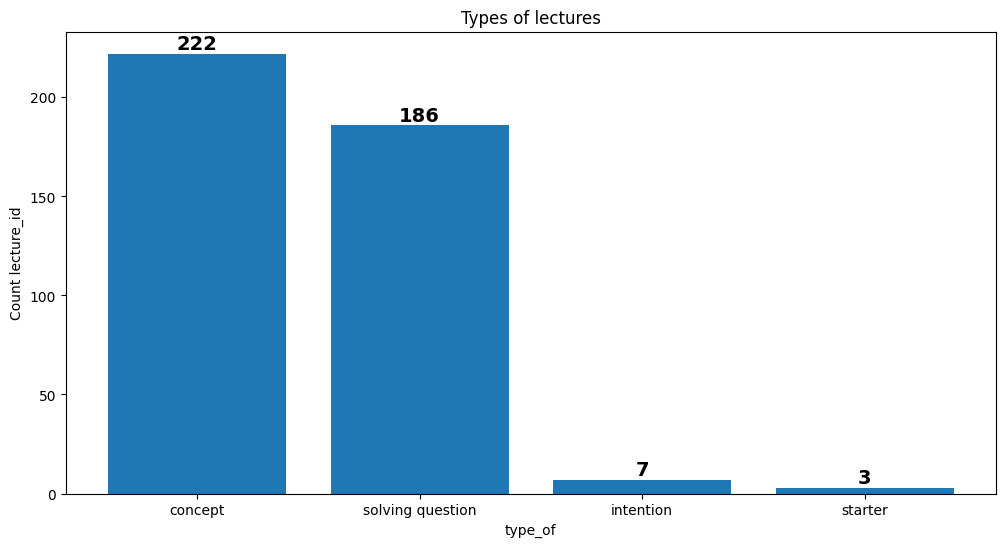

In [59]:
lect_type_of = lec_df.type_of.value_counts()

fig = plt.figure(figsize=(12,6))
plt.bar(lect_type_of.index, lect_type_of.values)
for i, v in zip(lect_type_of.index, lect_type_of.values):
    plt.text(i, v, v, color='black', fontweight='bold', fontsize=14, va='bottom', ha='center')
plt.title("Types of lectures")
plt.xlabel("type_of")
plt.ylabel("Count lecture_id")
plt.xticks(rotation=0)
plt.show()

Since there are not that many lectures, I want to check if it helps if a user watches lectures at all.

Watches_lecture
False    24467
True     15024
Name: count, dtype: int64


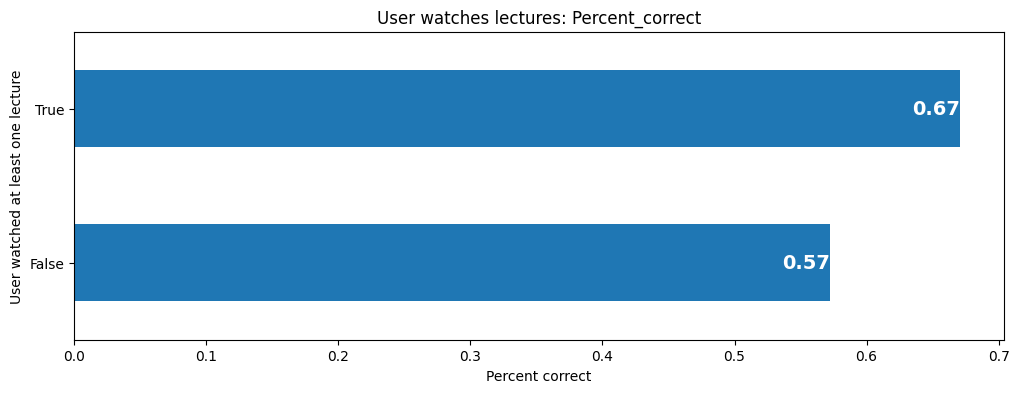

In [61]:
user_lect = train_df.groupby(["user_id", "answered_correctly"]).size().unstack()
user_lect.columns = ['Lecture', 'Wrong', 'Right']
user_lect['Lecture'] = user_lect['Lecture'].fillna(0)
user_lect = user_lect.astype('Int64')
user_lect['Watches_lecture'] = np.where(user_lect.Lecture > 0, True, False)

watches_l = user_lect.groupby("Watches_lecture").agg({'Wrong': ['sum'], 'Right': ['sum']})
print(user_lect.Watches_lecture.value_counts())

watches_l['Percent_correct'] = watches_l.Right/(watches_l.Right + watches_l.Wrong)

watches_l = watches_l.iloc[:,2]

fig = plt.figure(figsize=(12,4))
watches_l.plot.barh()
for i, v in zip(watches_l.index, watches_l.values):
    plt.text(v, i, round(v,2), color='white', fontweight='bold', fontsize=14, ha='right', va='center')

plt.title("User watches lectures: Percent_correct")
plt.xlabel("Percent correct")
plt.ylabel("User watched at least one lecture")
plt.xticks(rotation=0)
plt.show()

Lecture help people

Batches (task_container_id) may also contain lectures, and I want to find out if there are any batches with high numbers of lectures.

In [63]:
batch_lect = train_df.groupby(["task_container_id", "answered_correctly"]).size().unstack()
batch_lect.columns = ['Lecture', 'Wrong', 'Right']
batch_lect['Lecture'] = batch_lect['Lecture'].fillna(0)
batch_lect = batch_lect.astype('Int64')
batch_lect['Percent_correct'] = batch_lect.Right/(batch_lect.Wrong + batch_lect.Right)
batch_lect['Percent_lecture'] = batch_lect.Lecture/(batch_lect.Lecture + batch_lect.Wrong + batch_lect.Right)
batch_lect = batch_lect.sort_values(by = "Percent_lecture", ascending = False)

print(f'The highest number of lectures watched within a single task_container_id is {batch_lect.Lecture.max()}.')

The highest number of lectures watched within a single task_container_id is 523.


In [64]:
batch_lect.head()

,Lecture,Wrong,Right,Percent_correct,Percent_lecture
task_container_id,,,,,
9651,2,4,10,0.714286,0.125
9034,2,5,12,0.705882,0.105263
9785,2,3,15,0.833333,0.1
8409,2,6,13,0.684211,0.095238
9596,2,10,9,0.473684,0.095238


How we can see lectures make up only a small part (at most this is comparable to 1%)

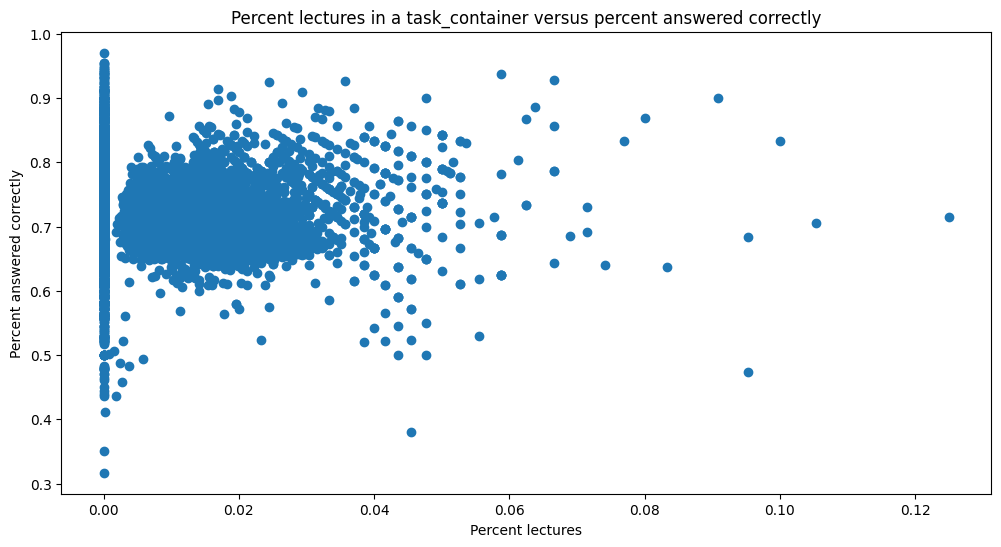

In [65]:
batch = batch_lect.iloc[:, 3:]

fig = plt.figure(figsize=(12,6))
x = batch.Percent_lecture
y = batch.Percent_correct
plt.scatter(x, y, marker='o')
plt.title("Percent lectures in a task_container versus percent answered correctly")
plt.xticks(rotation=0)
plt.xlabel("Percent lectures")
plt.ylabel("Percent answered correctly")

plt.show()

maby we dont use anaf data but now i cant see any corr between lecture and correct answerd

In [67]:
batch_lect['Has_lecture'] = np.where(batch_lect.Lecture == 0, False, True)
print(f'We have {batch_lect[batch_lect.Has_lecture == True].shape[0]} task_container_ids with lectures and {batch_lect[batch_lect.Has_lecture == False].shape[0]} task_container_ids without lectures.')

We have 5979 task_container_ids with lectures and 4021 task_container_ids without lectures.


In [68]:
batch_lect = batch_lect[['Wrong', 'Right', 'Has_lecture']]
batch_lect = batch_lect.groupby("Has_lecture").sum()
batch_lect['Percent_correct'] = batch_lect.Right/(batch_lect.Wrong + batch_lect.Right)
batch_lect = batch_lect[['Percent_correct']]
batch_lect

,Percent_correct
Has_lecture,
False,0.735944
True,0.656856


perhaps there are lectures only on complex issues, but so far there is no pattern